In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import h5py
import matplotlib.pyplot as plt

# Read the file
file = 'D:\Education\model_newspc_250.h5'
model = tf.keras.models.load_model(file)

In [2]:
#Get the summary
model.summary()

#Input layer
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases = model.layers[0].get_weights()[1]
print(first_layer_weights.shape, first_layer_biases.shape)
#print(first_layer_weights, first_layer_biases)

# Hidden layer 1
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases = model.layers[1].get_weights()[1]
#print(second_layer_weights, second_layer_biases)
print(second_layer_weights.shape, second_layer_biases.shape)

# Hidden layer 2
third_layer_weights = model.layers[2].get_weights()[0]
third_layer_biases = model.layers[2].get_weights()[1]
print(third_layer_weights.shape, third_layer_biases.shape)

# output layer
fourth_layer_weights = model.layers[3].get_weights()[0]
fourth_layer_biases = model.layers[3].get_weights()[1]
print(fourth_layer_weights.shape, fourth_layer_biases.shape)

Model: "Heat_release_rate"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 40)                1320      
_________________________________________________________________
h_layer1 (Dense)             (None, 24)                984       
_________________________________________________________________
h_layer2 (Dense)             (None, 24)                600       
_________________________________________________________________
output_layers (Dense)        (None, 1)                 25        
Total params: 2,929
Trainable params: 2,929
Non-trainable params: 0
_________________________________________________________________
(32, 40) (40,)
(40, 24) (24,)
(24, 24) (24,)
(24, 1) (1,)


In [3]:
f = 'D:\Education\HRR\chunk\Chunk_for_auto_diff.hdf5'
f1 = h5py.File(f, 'r')

In [4]:
# Get the data
X = f1.get('X_trainC')
Y = f1.get('Y_trainC')
print(X.shape, Y.shape )

(99999, 32) (99999, 1)


In [5]:
# Define a loss function
def loss_fun(y_true, y_pred):
    loss = tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)
    return loss

In [6]:
#Change the data type to varaible 
X = tf.Variable(X)
print(X)

<tf.Variable 'Variable:0' shape=(99999, 32) dtype=float32, numpy=
array([[4.9808690e-01, 1.5268852e-03, 5.5949847e-08, ..., 4.6616623e-01,
        3.3953732e-01, 5.4953533e-01],
       [9.1676277e-01, 2.3676723e-03, 3.6250869e-09, ..., 4.7412883e-02,
        2.5126025e-01, 7.9589957e-01],
       [3.4234279e-01, 8.2153387e-02, 9.1788390e-09, ..., 6.6166806e-01,
        2.4726778e-02, 3.5230976e-01],
       ...,
       [3.9313820e-01, 5.6410837e-03, 5.6384476e-08, ..., 6.1220878e-01,
        1.2847331e-01, 4.3392009e-01],
       [9.3293750e-01, 2.7711664e-03, 6.7890920e-09, ..., 7.3254555e-02,
        3.8133118e-01, 8.2027155e-01],
       [6.1299586e-01, 8.6667482e-04, 5.6131828e-08, ..., 3.2334140e-01,
        5.3176922e-01, 6.3289732e-01]], dtype=float32)>


In [7]:
with tf.GradientTape() as g:
    g.watch(X)
    pred = model(X, training=False)  # Logits for this minibatch
    # Compute the loss value for this minibatch.
    #loss_value = loss_fun(Y, pred)
grads = g.gradient(pred, X)
print(grads)
print(grads.shape)

tf.Tensor(
[[ 0.3689844   0.05514234  0.01484506 ...  0.22977483  0.33681607
  -0.7824224 ]
 [ 0.23713794 -0.00297932  0.07205284 ...  0.24027145  0.28817403
  -0.4775291 ]
 [ 0.9266844   0.02653489  0.25536162 ...  0.28247952  1.0165994
  -1.1639881 ]
 ...
 [ 0.5959558   0.0626542   0.09971662 ...  0.20602925  0.6087623
  -0.88567513]
 [ 0.27186736  0.00212326  0.04681288 ...  0.3193039   0.3537524
  -0.69745916]
 [ 0.2902519   0.04663497 -0.02523661 ...  0.22418386  0.23631921
  -0.7889031 ]], shape=(99999, 32), dtype=float32)
(99999, 32)


C:\Users\SRIJIT~1\AppData\Local\Temp/ipykernel_15056/2900331427.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


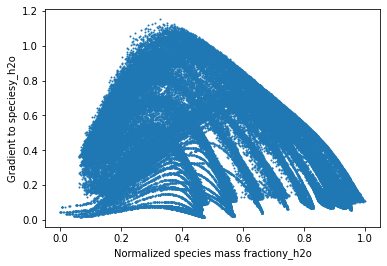

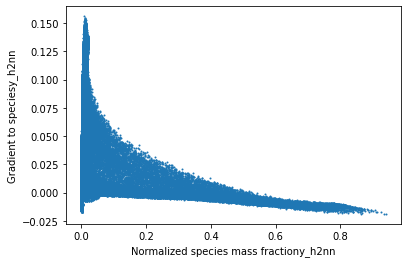

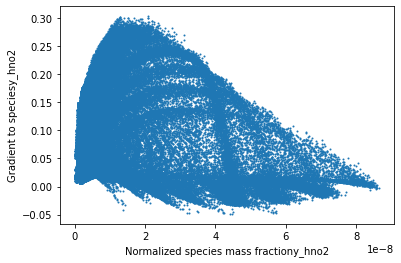

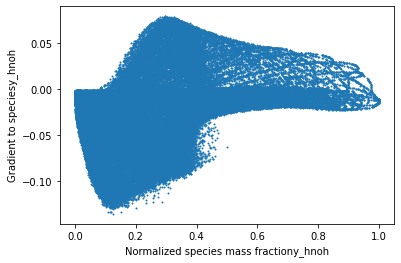

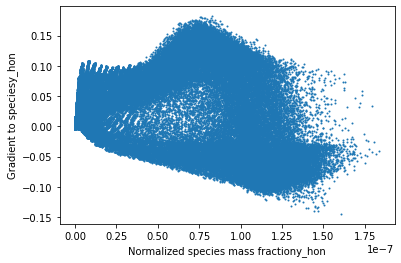

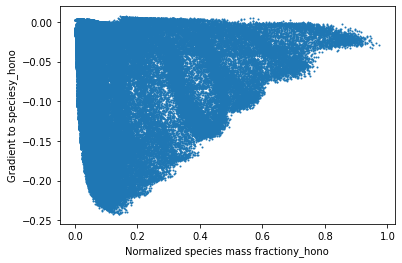

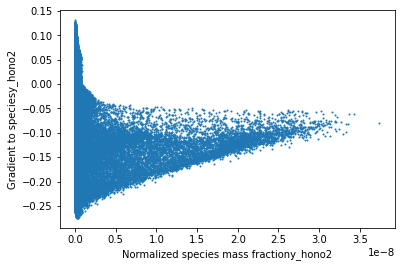

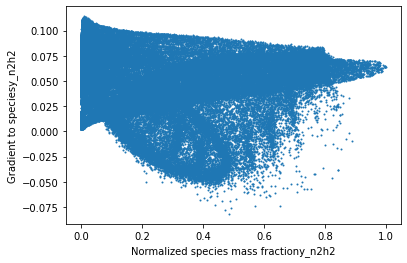

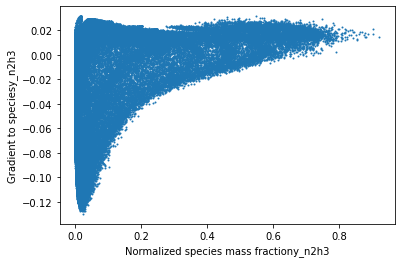

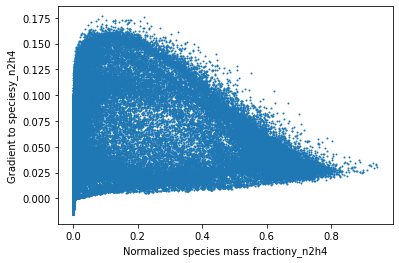

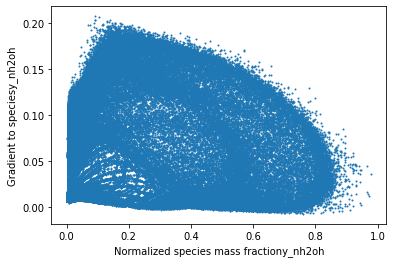

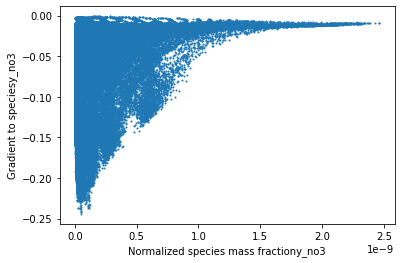

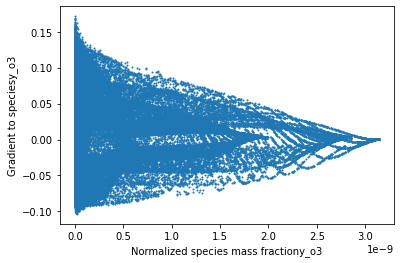

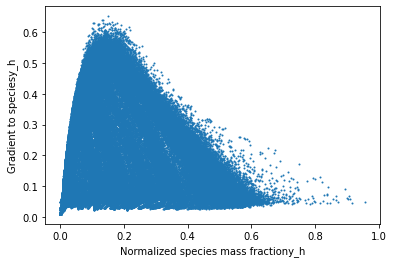

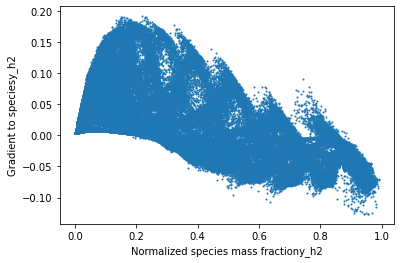

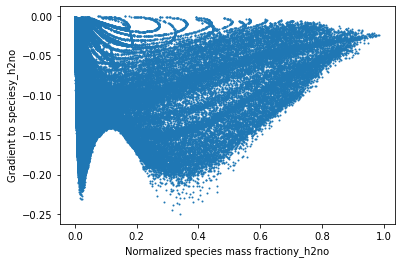

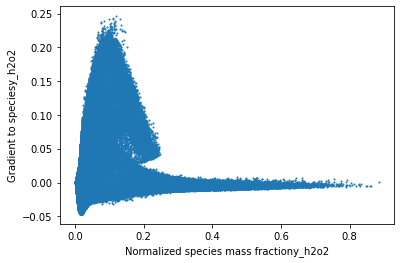

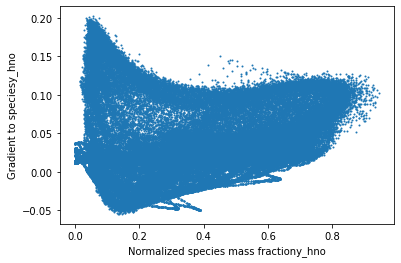

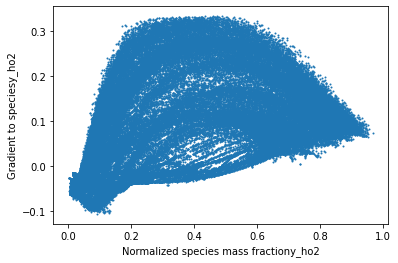

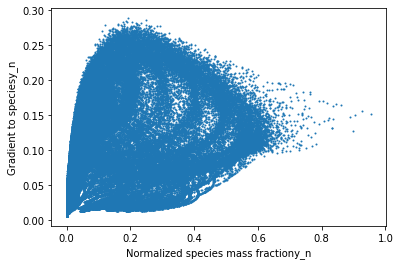

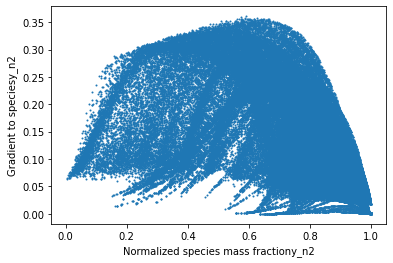

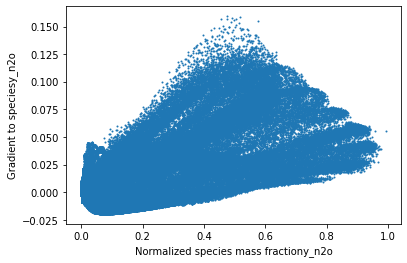

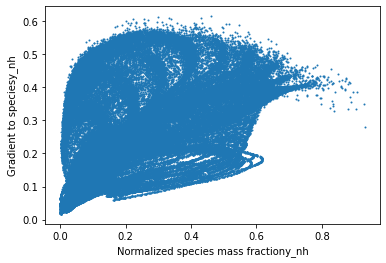

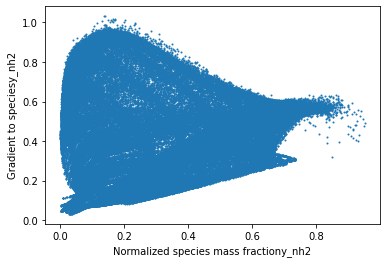

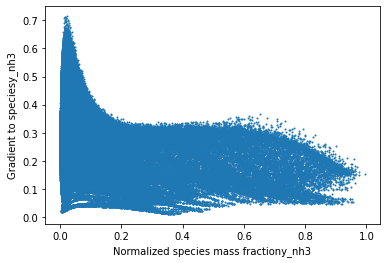

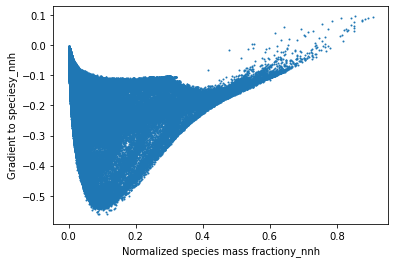

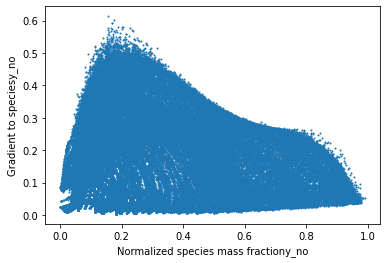

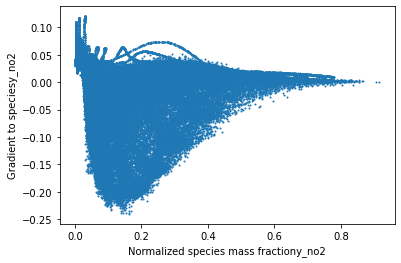

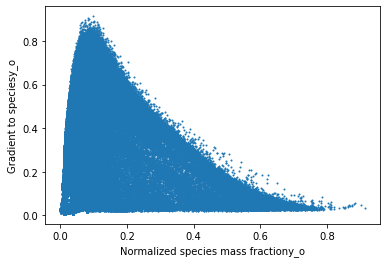

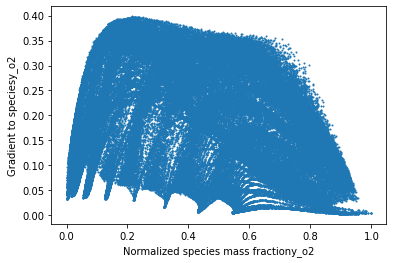

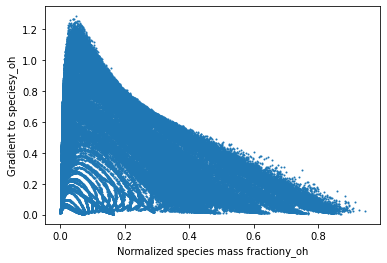

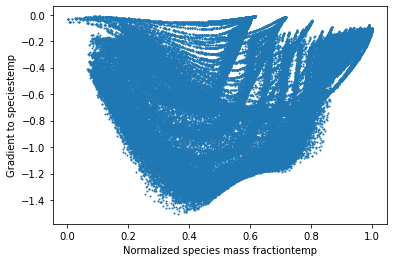

In [17]:
y = ["y_h2o", "y_h2nn", "y_hno2", "y_hnoh", "y_hon", "y_hono", "y_hono2", "y_n2h2", "y_n2h3", "y_n2h4", "y_nh2oh",
     "y_no3", "y_o3","y_h", "y_h2", "y_h2no", "y_h2o2", "y_hno", "y_ho2", "y_n", "y_n2", "y_n2o", "y_nh", "y_nh2",
     "y_nh3", "y_nnh", "y_no", "y_no2", "y_o", "y_o2", "y_oh", "temp"]
for i in range(32):
    x_inp = np.array(X[:,i])
    grad_of_inp = np.array(grads[:,i])
    
    plt.figure(i)
    plt.scatter(x_inp, grad_of_inp, s=1)
    plt.xlabel('Normalized species mass fraction '+ str( y[i]) )
    plt.ylabel('Gradient to species '+ str( y[i] ))
    plt.savefig("Gradient of output to species " + str( y[i] ) + ".png")
